## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman2Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman2Dataset.friedman2_data(n_samples)

          X1           X2        X3        X4           Y
0  56.750238   508.407727  0.144718  6.997198   92.928916
1   4.290124  1348.222980  0.369952  2.490479  498.931894
2  98.712779   617.186604  0.407952  5.367608  270.490164
3  16.231001   305.258219  0.099899  2.163342   34.682462
4  24.966978   743.251974  0.929551  7.864701  691.266169


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 0.9624917	total: 57.9ms	remaining: 57.8s
1:	learn: 0.9524958	total: 58.4ms	remaining: 29.2s
2:	learn: 0.9442029	total: 59ms	remaining: 19.6s
3:	learn: 0.9320789	total: 59.4ms	remaining: 14.8s
4:	learn: 0.9203335	total: 59.9ms	remaining: 11.9s
5:	learn: 0.9095851	total: 60.3ms	remaining: 9.99s
6:	learn: 0.8976671	total: 60.9ms	remaining: 8.63s
7:	learn: 0.8867583	total: 61.2ms	remaining: 7.59s
8:	learn: 0.8774579	total: 61.8ms	remaining: 6.8s
9:	learn: 0.8648974	total: 62.2ms	remaining: 6.16s
10:	learn: 0.8531733	total: 62.7ms	remaining: 5.63s
11:	learn: 0.8406907	total: 63.4ms	remaining: 5.21s
12:	learn: 0.8293780	total: 63.9ms	remaining: 4.85s
13:	learn: 0.8181979	total: 64.3ms	remaining: 4.53s
14:	learn: 0.8074330	total: 64.7ms	remaining: 4.25s
15:	learn: 0.7978898	total: 65.1ms	remaining: 4s
16:	learn: 0.7883160	total: 65.4ms	remaining: 3.78s
17:	learn: 0.7791491	total: 65.8ms	remaining: 3.59s
18:	learn: 0.7724612	total: 66.3ms	remaining: 3.42

113:	learn: 0.2784442	total: 108ms	remaining: 842ms
114:	learn: 0.2755691	total: 109ms	remaining: 838ms
115:	learn: 0.2721074	total: 109ms	remaining: 833ms
116:	learn: 0.2697946	total: 110ms	remaining: 829ms
117:	learn: 0.2674766	total: 110ms	remaining: 823ms
118:	learn: 0.2654772	total: 111ms	remaining: 819ms
119:	learn: 0.2632675	total: 111ms	remaining: 813ms
120:	learn: 0.2608692	total: 111ms	remaining: 810ms
121:	learn: 0.2578086	total: 112ms	remaining: 806ms
122:	learn: 0.2556594	total: 112ms	remaining: 801ms
123:	learn: 0.2526258	total: 113ms	remaining: 798ms
124:	learn: 0.2503247	total: 113ms	remaining: 792ms
125:	learn: 0.2475290	total: 113ms	remaining: 787ms
126:	learn: 0.2449200	total: 114ms	remaining: 783ms
127:	learn: 0.2426417	total: 114ms	remaining: 778ms
128:	learn: 0.2405337	total: 115ms	remaining: 773ms
129:	learn: 0.2384051	total: 115ms	remaining: 769ms
130:	learn: 0.2366892	total: 115ms	remaining: 765ms
131:	learn: 0.2349975	total: 116ms	remaining: 761ms
132:	learn: 

289:	learn: 0.0745836	total: 186ms	remaining: 456ms
290:	learn: 0.0740399	total: 187ms	remaining: 455ms
291:	learn: 0.0737376	total: 187ms	remaining: 454ms
292:	learn: 0.0735067	total: 188ms	remaining: 453ms
293:	learn: 0.0732623	total: 188ms	remaining: 451ms
294:	learn: 0.0729617	total: 188ms	remaining: 450ms
295:	learn: 0.0727029	total: 189ms	remaining: 449ms
296:	learn: 0.0724300	total: 189ms	remaining: 447ms
297:	learn: 0.0721679	total: 189ms	remaining: 446ms
298:	learn: 0.0717969	total: 190ms	remaining: 445ms
299:	learn: 0.0713306	total: 190ms	remaining: 443ms
300:	learn: 0.0709656	total: 190ms	remaining: 442ms
301:	learn: 0.0707512	total: 191ms	remaining: 441ms
302:	learn: 0.0705393	total: 191ms	remaining: 440ms
303:	learn: 0.0702698	total: 192ms	remaining: 438ms
304:	learn: 0.0700088	total: 192ms	remaining: 437ms
305:	learn: 0.0697461	total: 192ms	remaining: 436ms
306:	learn: 0.0695053	total: 193ms	remaining: 435ms
307:	learn: 0.0692670	total: 193ms	remaining: 434ms
308:	learn: 

532:	learn: 0.0307375	total: 290ms	remaining: 254ms
533:	learn: 0.0306523	total: 291ms	remaining: 254ms
534:	learn: 0.0305771	total: 291ms	remaining: 253ms
535:	learn: 0.0304758	total: 291ms	remaining: 252ms
536:	learn: 0.0303498	total: 292ms	remaining: 252ms
537:	learn: 0.0303163	total: 292ms	remaining: 251ms
538:	learn: 0.0302343	total: 293ms	remaining: 250ms
539:	learn: 0.0301423	total: 293ms	remaining: 250ms
540:	learn: 0.0300299	total: 294ms	remaining: 249ms
541:	learn: 0.0299588	total: 294ms	remaining: 248ms
542:	learn: 0.0298634	total: 295ms	remaining: 248ms
543:	learn: 0.0297538	total: 295ms	remaining: 247ms
544:	learn: 0.0296852	total: 295ms	remaining: 246ms
545:	learn: 0.0295857	total: 296ms	remaining: 246ms
546:	learn: 0.0294776	total: 296ms	remaining: 245ms
547:	learn: 0.0293862	total: 296ms	remaining: 244ms
548:	learn: 0.0293314	total: 297ms	remaining: 244ms
549:	learn: 0.0292419	total: 297ms	remaining: 243ms
550:	learn: 0.0291236	total: 298ms	remaining: 243ms
551:	learn: 

713:	learn: 0.0155172	total: 367ms	remaining: 147ms
714:	learn: 0.0154528	total: 368ms	remaining: 147ms
715:	learn: 0.0154091	total: 368ms	remaining: 146ms
716:	learn: 0.0153358	total: 369ms	remaining: 146ms
717:	learn: 0.0152698	total: 369ms	remaining: 145ms
718:	learn: 0.0152060	total: 370ms	remaining: 144ms
719:	learn: 0.0151350	total: 370ms	remaining: 144ms
720:	learn: 0.0150725	total: 370ms	remaining: 143ms
721:	learn: 0.0150401	total: 371ms	remaining: 143ms
722:	learn: 0.0150083	total: 371ms	remaining: 142ms
723:	learn: 0.0149764	total: 372ms	remaining: 142ms
724:	learn: 0.0149347	total: 372ms	remaining: 141ms
725:	learn: 0.0148726	total: 373ms	remaining: 141ms
726:	learn: 0.0148416	total: 373ms	remaining: 140ms
727:	learn: 0.0148048	total: 373ms	remaining: 139ms
728:	learn: 0.0147371	total: 374ms	remaining: 139ms
729:	learn: 0.0146774	total: 374ms	remaining: 138ms
730:	learn: 0.0146416	total: 375ms	remaining: 138ms
731:	learn: 0.0145820	total: 375ms	remaining: 137ms
732:	learn: 

955:	learn: 0.0078902	total: 471ms	remaining: 21.7ms
956:	learn: 0.0078820	total: 472ms	remaining: 21.2ms
957:	learn: 0.0078655	total: 472ms	remaining: 20.7ms
958:	learn: 0.0078447	total: 473ms	remaining: 20.2ms
959:	learn: 0.0078182	total: 473ms	remaining: 19.7ms
960:	learn: 0.0077888	total: 474ms	remaining: 19.2ms
961:	learn: 0.0077694	total: 474ms	remaining: 18.7ms
962:	learn: 0.0077498	total: 475ms	remaining: 18.2ms
963:	learn: 0.0077157	total: 475ms	remaining: 17.7ms
964:	learn: 0.0076821	total: 476ms	remaining: 17.2ms
965:	learn: 0.0076631	total: 476ms	remaining: 16.7ms
966:	learn: 0.0076529	total: 476ms	remaining: 16.3ms
967:	learn: 0.0076198	total: 477ms	remaining: 15.8ms
968:	learn: 0.0076098	total: 477ms	remaining: 15.3ms
969:	learn: 0.0075772	total: 478ms	remaining: 14.8ms
970:	learn: 0.0075691	total: 478ms	remaining: 14.3ms
971:	learn: 0.0075646	total: 478ms	remaining: 13.8ms
972:	learn: 0.0075462	total: 479ms	remaining: 13.3ms
973:	learn: 0.0075167	total: 479ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape)
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)

mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

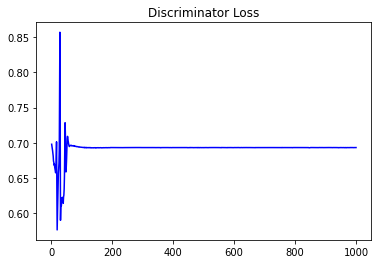

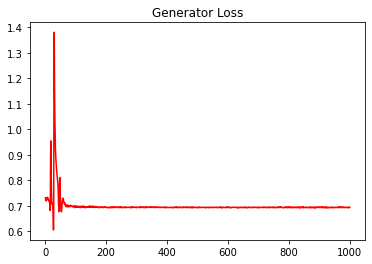

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.015016708050899422


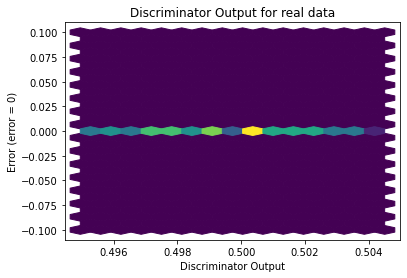

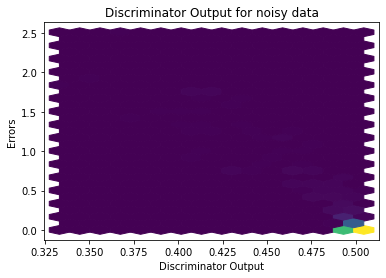

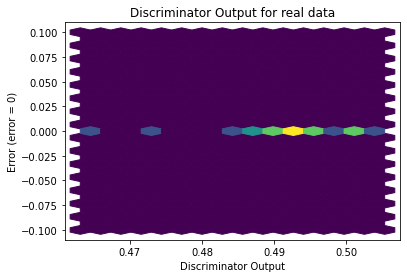

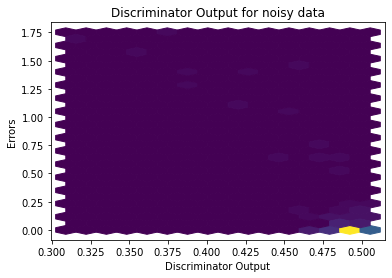

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


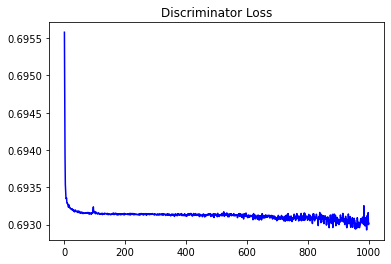

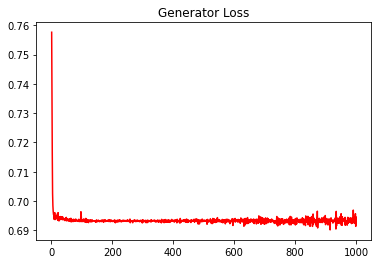

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.03396337590532478


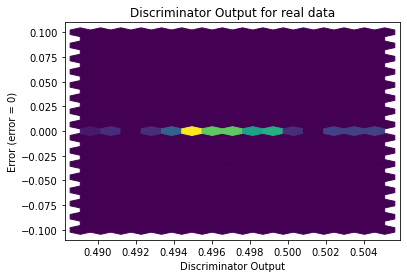

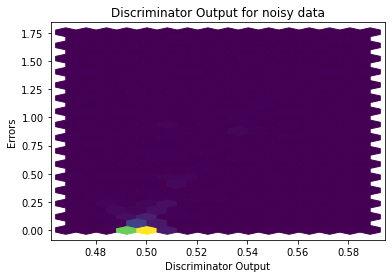

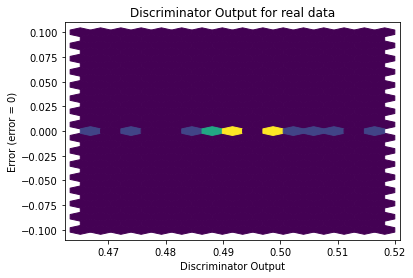

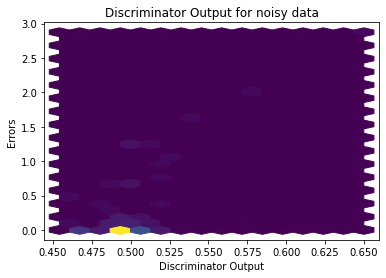

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
